## Assignment 4

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for X and/or Y until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [1]:
#all the imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

%matplotlib inline

In [2]:
xls = pd.ExcelFile('Assignment4_linear_regresion_data.xlsx')

### Set 1 (tab of excel file)

In [3]:
df1 = pd.read_excel(xls, 'Set 1')
df1.head(5)

,y,x
0,38.858144,7.266278
1,40.891148,7.985333
2,48.971648,9.387120
3,46.410124,9.382849
4,25.333391,5.240903


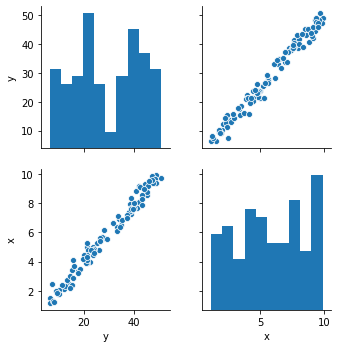

In [4]:
sns.pairplot(df1)

From the graphs in the lower left hand corner and upper right hand corner, you can see a fairly strong positive correlation, so no need to transform the data

In [5]:
#Initialize the regression model 
m = sm.ols('y ~ x', data = df1)

In [6]:
#Fit the regression model 
m = m.fit()

In [7]:
#Regression parameters
m.params

Intercept    0.238070
x            4.984259
dtype: float64

We have estimated the intercept to be approx 0.239 and the slope to be 4.984, thus the equation for predicting 
y = 0.239 + 4.984 * x

In [8]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.47e-84
Time:                        21:26:34   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Evaluating the OLS assumptions

In [9]:
intercept, slope = m.params
df1['y_est'] = intercept + slope * df1.x

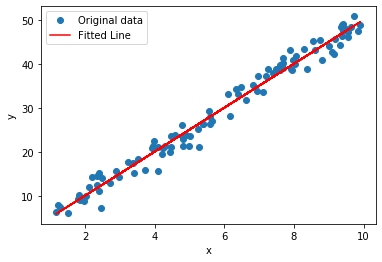

In [10]:
#Lets plot the estimates along with the actual observations
plt.plot(df1.x, df1.y, 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('y')


#Plot regression line 
plt.plot(df1.x, df1.y_est, 'r-', label='Fitted Line')

plt.legend()
plt.show()

count    1.000000e+02
mean     5.782042e-15
std      1.908727e+00
min     -3.763343e+00
25%     -1.472735e+00
50%     -2.630865e-01
75%      1.133296e+00
max      5.254912e+00
Name: Residuals, dtype: float64

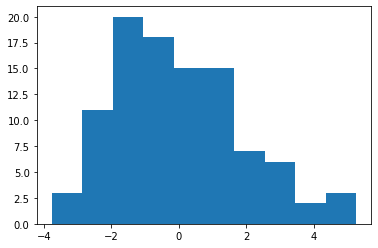

In [11]:
#Calculate the residuals
df1['Residuals'] = df1['y_est'] - df1['y']

#Plot a histogram of the residuals
df1_res_hist = plt.hist(df1.Residuals)

df1['Residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -3.76 to 5.25. Residuals mean and median are close to 0. Taken together the model seems to be valid

### Set 2 (tab of excel file)

In [12]:
df2 = pd.read_excel(xls, 'Set 2')
df2.head(5)

,y,x
0,28.045621,4.299210
1,39.148284,4.528143
2,17.361044,3.284988
3,18.413561,5.709732
4,7.857464,3.242708


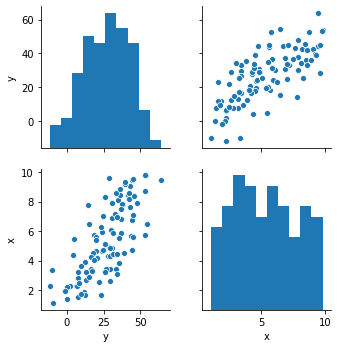

In [13]:
sns.pairplot(df2)

Y is pretty normally distributed so no need to transform the data

In [14]:
#Initialize the regression model 
m = sm.ols('y ~ x', data = df2)

In [15]:
#Fit the regression model 
m = m.fit()

In [16]:
#Regression parameters
m.params

Intercept    1.095552
x            4.777354
dtype: float64

We have estimated the intercept to be approx 1.096 and the slope to be 4.777, thus the equation for predicting 
y = 1.096 + 4.777 * x

In [17]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.11e-19
Time:                        21:26:36   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
intercept, slope = m.params
df2['y_est'] = intercept + slope * df2.x

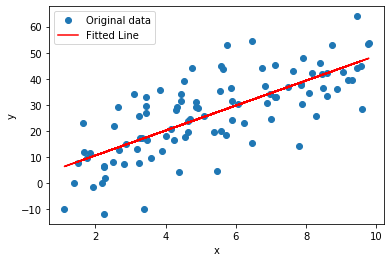

In [19]:
#Lets plot the estimates along with the actual observations
plt.plot(df2.x, df2.y, 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('y')


#Plot regression line 
plt.plot(df2.x, df2.y_est, 'r-', label='Fitted Line')

plt.legend()
plt.show()

count    1.000000e+02
mean    -1.332268e-14
std      1.041688e+01
min     -2.427189e+01
25%     -6.825796e+00
50%      3.255999e-01
75%      6.370633e+00
max      2.713100e+01
Name: Residuals, dtype: float64

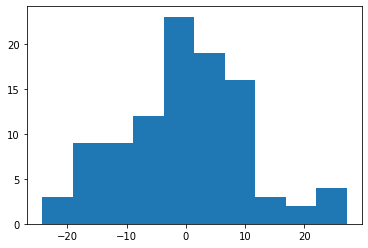

In [20]:
#Calculate the residuals
df2['Residuals'] = df2['y_est'] - df2['y']

#Plot a histogram of the residuals
df2_res_hist = plt.hist(df2.Residuals)

df2['Residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -24.272 to 27.131. Residuals mean and median are close to 0. Taken together the model seems to be valid

### Set 3 (tab of excel file)

In [21]:
df3 = pd.read_excel(xls, 'Set 3')
df3.head(5)

,Y,x
0,6428.915770,9.517
1,2640.000728,5.113
2,12858.599267,9.773
3,5491.450053,8.428
4,2838.820108,5.752


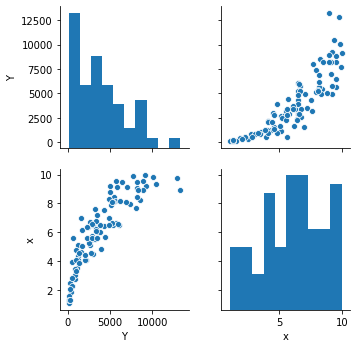

In [22]:
sns.pairplot(df3)

Y looks to be exponentially distributed, so we will transform the data

In [23]:
df3['log_y'] = np.log(df3['Y']) 
del df3['Y']

In [24]:
#Initialize the regression model 
m = sm.ols('log_y ~ x', data = df3)

In [25]:
#Fit the regression model 
m = m.fit()

In [26]:
#Regression parameters
m.params

Intercept    5.171611
x            0.436849
dtype: float64

We have estimated the intercept to be approx 5.172 and the slope to be 0.437, thus the equation for predicting 
y = 5.172 + 0.437 * x

In [27]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     519.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           5.82e-41
Time:                        21:26:39   Log-Likelihood:                -64.530
No. Observations:                 100   AIC:                             133.1
Df Residuals:                      98   BIC:                             138.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1716      0.124     41.690      0.000       4.925       5.418
x              0.4368      0.019     22.796      0.000       0.399       0.475
==============================================================================
Omnibus:                        3.457   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.160
Skew:                          -0.435   Prob(JB):                        0.206
Kurtosis:                       3.014   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
intercept, slope = m.params
df3['y_est'] = intercept + slope * df3.x

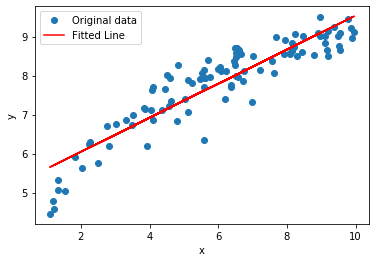

In [29]:
#Lets plot the estimates along with the actual observations
plt.plot(df3.x, df3.log_y, 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('y')

#Plot regression line 
plt.plot(df3.x, df3.y_est, 'r-', label='Fitted Line')

plt.legend()
plt.show()

In [30]:
#Calculate the residuals
df3['Residuals'] = df3['y_est'] - df3['log_y']

count    1.000000e+02
mean     8.881784e-18
std      4.636569e-01
min     -9.953774e-01
25%     -3.110409e-01
50%     -2.374832e-02
75%      2.706744e-01
max      1.274040e+00
Name: Residuals, dtype: float64

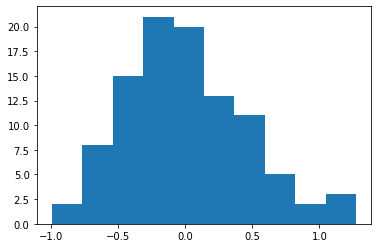

In [31]:
#Plot a histogram of the residuals
df3_res_hist = plt.hist(df3.Residuals)

df3['Residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -0.995 to 1.274. Residuals mean and median are close to 0. Taken together the model seems to be valid

### Set 4 (tab of excel file)

In [32]:
df4 = pd.read_excel(xls, 'Set 4')
df4.head(5)

,Y,x
0,1.887192e+05,5.9947
1,7.107264e+03,3.9492
2,3.729064e+06,9.6353
3,5.691779e+02,0.4943
4,3.022130e+06,9.0811


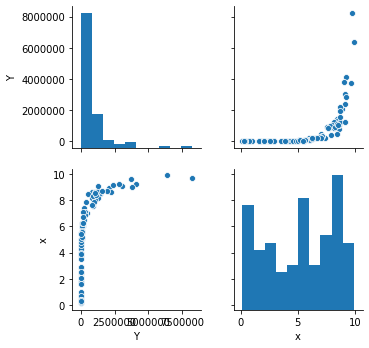

In [33]:
sns.pairplot(df4)

Y looks to be exponentially distributed, so we will transform the data

In [34]:
df4['log_y'] = np.log(df4['Y']) 
del df4['Y']

In [35]:
#Initialize the regression model 
m = sm.ols('log_y ~ x', data = df4)

In [36]:
#Fit the regression model 
m = m.fit()

In [37]:
#Regression parameters
m.params

Intercept    5.664722
x            0.989848
dtype: float64

We have estimated the intercept to be approx 5.665 and the slope to be 0.990, thus the equation for predicting 
y = 5.665 + 0.990 * x

In [38]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.91e-89
Time:                        21:26:41   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
x              0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
intercept, slope = m.params
df4['y_est'] = intercept + slope * df4.x

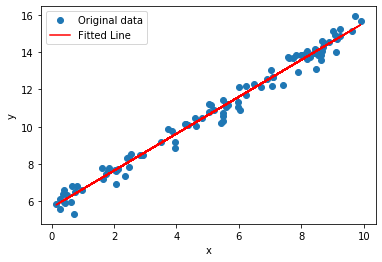

In [40]:
#Lets plot the estimates along with the actual observations
plt.plot(df4.x, df4.log_y, 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('y')

#Plot regression line 
plt.plot(df4.x, df4.y_est, 'r-', label='Fitted Line')

plt.legend()
plt.show()

In [41]:
#Calculate the residuals
df4['Residuals'] = df4['y_est'] - df4['log_y']

count    1.000000e+02
mean    -5.329071e-16
std      3.853615e-01
min     -6.403407e-01
25%     -2.803581e-01
50%     -4.510877e-02
75%      1.901438e-01
max      1.057768e+00
Name: Residuals, dtype: float64

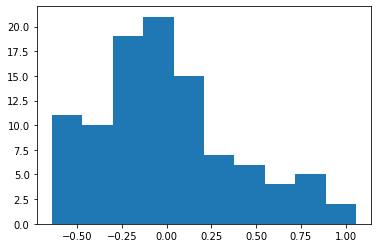

In [42]:
#Plot a histogram of the residuals
df4_res_hist = plt.hist(df4.Residuals)

df4['Residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -0.640 to 1.058. Residuals mean and median are close to 0. Taken together the model seems to be valid

### Set 5 (tab of excel file)

In [43]:
df5 = pd.read_excel(xls, 'Set 5')
df5.head(5)

,Y,X
0,47.320319,9.0527
1,39.862491,7.3135
2,42.225779,8.6471
3,30.010689,5.8579
4,43.900459,7.9357


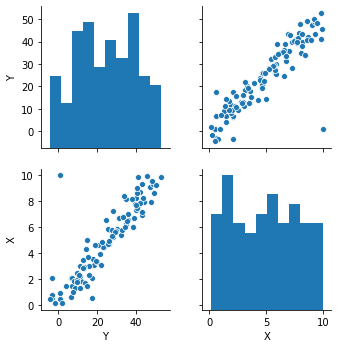

In [44]:
sns.pairplot(df5)

From the graphs in the lower left hand corner and upper right hand corner, you can see a positive correlation, so no need to transform the data

In [45]:
#Initialize the regression model 
m = sm.ols('Y ~ X', data = df5)

In [46]:
#Fit the regression model 
m = m.fit()

In [47]:
#Regression parameters
m.params

Intercept    0.921257
X            4.767081
dtype: float64

We have estimated the intercept to be approx 0.921 and the slope to be 4.767, thus the equation for predicting 
y = 0.921 + 4.767 * x

In [48]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.70e-37
Time:                        21:26:43   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
X              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
intercept, slope = m.params
df5['y_est'] = intercept + slope * df5.X

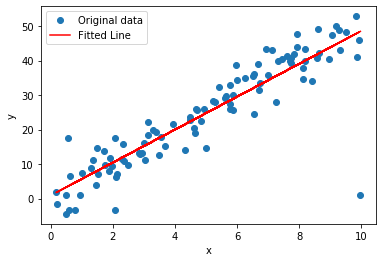

In [50]:
#Lets plot the estimates along with the actual observations
plt.plot(df5.X, df5.Y, 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('y')


#Plot regression line 
plt.plot(df5.X, df5.y_est, 'r-', label='Fitted Line')

plt.legend()
plt.show()

In [51]:
#Calculate the residuals
df5['Residuals'] = df5['y_est'] - df5['Y']

count    1.010000e+02
mean     7.738584e-16
std      6.666383e+00
min     -1.403782e+01
25%     -3.542946e+00
50%     -1.164350e+00
75%      2.449717e+00
max      4.742030e+01
Name: Residuals, dtype: float64

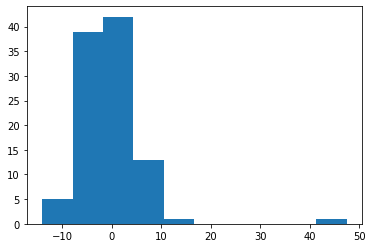

In [52]:
#Plot a histogram of the residuals
df5_res_hist = plt.hist(df5.Residuals)

df5['Residuals'].describe()

Residuals seem to be distributed normally, besides an outlier. The prediction error ranges from -14.034 to 47.421. Residuals mean and median are close to 0. Taken together the model seems to valid

In [53]:
#Let's remove the outlier and run the model again for fun
df5.max()

Y            52.839325
X             9.970710
y_est        48.452437
Residuals    47.420297
dtype: float64

In [54]:
#Based on the above, we only want rows of data that have residuals < 47 which contains the outlier 
df5_no_out = df5[df5.Residuals < 47]

In [55]:
df5_no_out.max()

Y            52.839325
X             9.939200
y_est        48.302226
Residuals    14.231371
dtype: float64

In [56]:
#Drop columns y_est and residuals and rerun model 
del df5_no_out['y_est']
del df5_no_out['Residuals']

In [57]:
df5_no_out.head()

,Y,X
0,47.320319,9.0527
1,39.862491,7.3135
2,42.225779,8.6471
3,30.010689,5.8579
4,43.900459,7.9357


In [58]:
#Initialize the regression model 
m = sm.ols('Y ~ X', data = df5_no_out)
#Fit the regression model 
m = m.fit()
#Regression parameters
m.params

Intercept   -0.099290
X            5.070538
dtype: float64

The new equation for predicting y = -0.099 + 5.071 * x where before removing the outlier it was y = 0.921 + 4.767 * x, you can see that the intercept is now negative while the slope is slightly higher

In [59]:
#Graphing the model without the outlier 
intercept, slope = m.params
df5_no_out['y_est'] = intercept + slope * df5_no_out.X

/Users/Andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


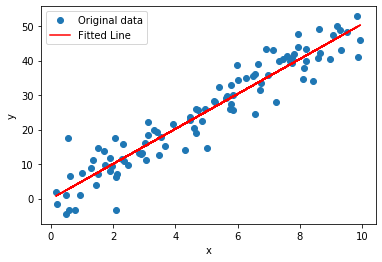

In [60]:
#Lets plot the estimates along with the actual observations
plt.plot(df5_no_out.X, df5_no_out.Y, 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('y')


#Plot regression line 
plt.plot(df5_no_out.X, df5_no_out.y_est, 'r-', label='Fitted Line')

plt.legend()
plt.show()

You can generally see that the line slightly fits better

### Set 6 (tab of excel file)

In [61]:
df6 = pd.read_excel(xls, 'Set 6')
df6.head(5)

,y,x
0,-2.764835,1.1290
1,61.065734,6.9100
2,52.854588,7.8374
3,-2.881062,0.1335
4,59.045448,9.2425


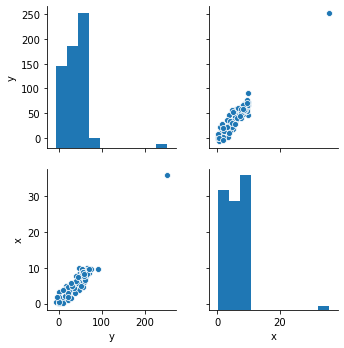

In [62]:
sns.pairplot(df6)

From the graphs in the lower left hand corner and upper right hand corner, you can see a positive correlation, besides the one very obvious outlier, so let's remove it before proceeding

In [63]:
df6.max()

y    252.837897
x     35.783400
dtype: float64

In [64]:
df6_no_out = df6[df6.y < 252]

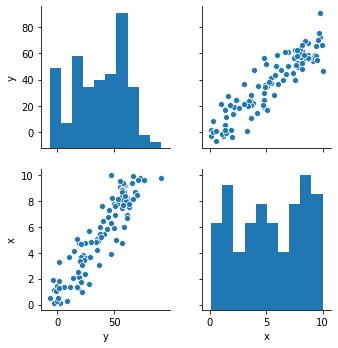

In [65]:
sns.pairplot(df6_no_out)

Much better! Let's proceed with the OLS 

In [66]:
#Initialize the regression model 
m = sm.ols('y ~ x', data = df6_no_out)
#Fit the regression model 
m = m.fit()
#Regression parameters
m.params

Intercept   -0.020325
x            6.970334
dtype: float64

We have estimated the intercept to be approx -0.020 and the slope to be 6.970, thus the equation for predicting 
y = -0.020 + 6.970 * x

In [67]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.29e-40
Time:                        21:26:48   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0203      1.899     -0.011      0.991      -3.788       3.748
x              6.9703      0.311     22.420      0.000       6.353       7.587
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.261
Skew:                           0.123   Prob(JB):                        0.877
Kurtosis:                       3.044   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
intercept, slope = m.params
df6_no_out['y_est'] = intercept + slope * df6_no_out.x

/Users/Andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


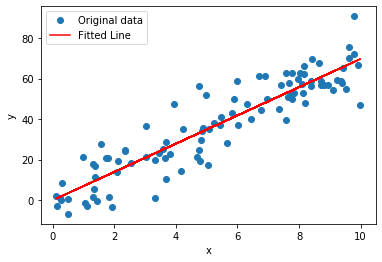

In [69]:
#Lets plot the estimates along with the actual observations
plt.plot(df6_no_out.x, df6_no_out.y, 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('y')


#Plot regression line 
plt.plot(df6_no_out.x, df6_no_out.y_est, 'r-', label='Fitted Line')

plt.legend()
plt.show()

/Users/Andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    1.000000e+02
mean    -1.538325e-14
std      9.295544e+00
min     -2.328386e+01
25%     -5.775247e+00
50%      4.739004e-01
75%      5.106210e+00
max      2.277057e+01
Name: Residuals, dtype: float64

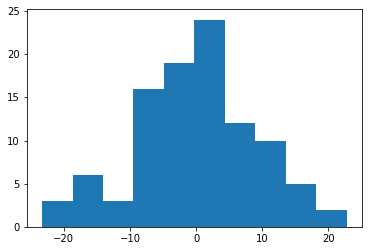

In [70]:
#Calculate the residuals
df6_no_out['Residuals'] = df6_no_out['y_est'] - df6_no_out['y']

#Plot a histogram of the residuals
df6_res_hist = plt.hist(df6_no_out.Residuals)

df6_no_out['Residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -23.284 to 22.771. Residuals mean and median are close to 0. Taken together the model seems to be valid